# Сборный проект

Мы работаем с данными содержащими в себе информацию о продаже игр до 2016 года. Наша задача  выявить закономерности определяющие успешность игр 

Для начала импортируем все необходимые библиотеки для работы 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Сохраним в переменную <mark>games_data</mark> наш .csv файл

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

Выведем 10 случайных строк и изучим общую информацию

In [3]:
games_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8804,Rudra no Hihou,SNES,1996.0,Role-Playing,0.00,0.00,0.15,0.00,NaN,NaN,NaN
1124,Prince of Persia: Warrior Within,PS2,2004.0,Action,0.54,0.88,0.00,0.22,83.0,8.5,M
13833,Metal Slug XX,PSP,2009.0,Shooter,0.03,0.00,0.00,0.00,67.0,6.1,T
2107,Dead Space 3,X360,2013.0,Action,0.64,0.26,0.00,0.08,78.0,6.4,M
15067,Warhammer Online: Age of Reckoning,PC,2008.0,Role-Playing,0.00,0.02,0.00,0.00,86.0,7.9,T
13429,Hiiro no Kakera DS,DS,2008.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13937,Gitaroo Man Lives!,PSP,2006.0,Misc,0.03,0.00,0.00,0.00,NaN,NaN,NaN
13457,Bubble Bobble Revolution,DS,2005.0,Puzzle,0.04,0.00,0.00,0.00,38.0,6.2,E
8844,Pro Baseball Spirits 2015,PS3,2015.0,Action,0.00,0.00,0.15,0.00,NaN,NaN,NaN
4982,Ice Age,GBA,2002.0,Action,0.27,0.10,0.00,0.01,47.0,tbd,E


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


## Предобработка данных

Приведем названия всех столбцов к нижнему регистру

In [6]:
games_data.columns = games_data.columns.str.lower()
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим пропуски в столбце <mark>name</mark>

In [7]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две неинформативные строки которые можно удалить 

In [8]:
games_data = games_data.dropna(subset=['name'])

Посчитаем пропуски во всех столбцах

In [9]:
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [10]:
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Просмотрев пропуски в столбце <mark>'year_of_release'</mark> видно, что год релиза игры в некоторых строках указан в конце названия в столбце <mark>'name'</mark>

Создадим функцию которая будет принимать строки из датафрейма в столбце <mark>'year_of_release'</mark> у которых пропуск и будет возвращать нам int значение последних 4 символов минус 1, если они числовые

In [11]:
def release_year(row):
    # Если последние 4 символа числовые то мы возвращаем их int-ом и отнимаем 1
    if row['name'][-4:].isnumeric():
        return int(row['name'][-4:])-1

Применим нашу функцию и сохраним Series с результатом во временную переменную ***temp***

In [12]:
temp = games_data[games_data['year_of_release'].isna()].apply(release_year, axis=1)
temp

183      2003.0
377      2003.0
456         NaN
475      2005.0
609         NaN
          ...  
16373    2007.0
16405       NaN
16448       NaN
16458       NaN
16522       NaN
Length: 269, dtype: float64

Через **for** цикл пройдемся по всем индексам в сохраненной переменной и присвоим в нашем исходном датафрейме пропуски в столбце <mark>'year_of_release'</mark> значения из переменной

In [13]:
for index in temp.index:
    games_data.loc[index,'year_of_release'] = temp[index]

Проверим сколько пропусков удалось убрать

In [14]:
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таким образом удалось избавиться от 15 пропусков. Не слишком много, но данный метод мог бы оказаться более полезным в случае если бы таких ситуаций было больше. Остальные пропуски в этом столбце оставим как есть 

Термин TBD ( англ. to be determined) означает - что к моменту заполнения данной таблицы не было конкретной информации и означает, что в контексте нашей таблицы TBD равнозначно NaN. можно заменить TBD на NaN для дальнейшей работы с этим столбцом как с числовым 

Далее переведем тип данных в этом столбце с str на float

In [15]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)
games_data['user_score'] = games_data['user_score'].astype(float)

Создадим новый столбец который содержит в себе данные о суммарных продажах во всех регионах и назовем его <mark>'total_sales'</mark>

In [16]:
games_data['total_sales'] = games_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [18]:
games_data['rating'].replace(['EC', 'K-A'], 'E', inplace=True)

In [19]:
games_data['rating'] = games_data['rating'].fillna('RP')
games_data['rating'].value_counts()

RP      6767
E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

*Вывод:* Предобработка данных завершена, данные подкорректированы, приступаем к исследовательскому анализу 

## Исследовательский анализ данных

Для начала посмотрим количество выпускаемых игр по годам

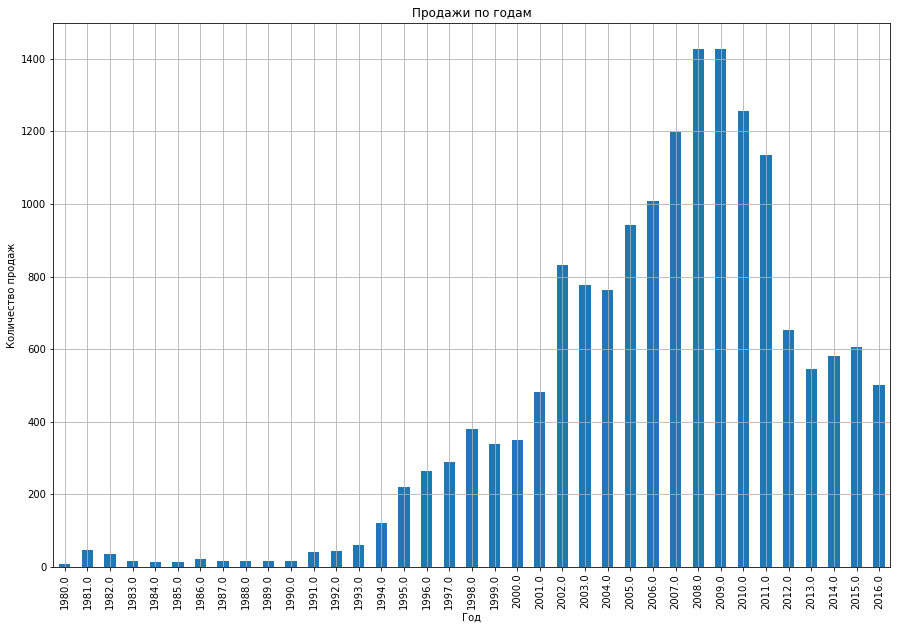

In [20]:
games_data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15, 10), grid=True, xlabel='Год',
                                                          ylabel='Количество продаж', title='Продажи по годам');

По графику видно, что игровая индустрия начала свою бурную активность в середине 90-х и достигла своего пика в 2008-2009 годах, а далее началось резкое падение

Сгруппируем данные по платформам и сумме всех продаж. Также отсортируем данные по продажам и выведем топ 10 самых популярных платформ за все время наблюдения 

In [21]:
top_10_platform = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

Построим графики по каждой платформе, входящей в топ 10 и по годам

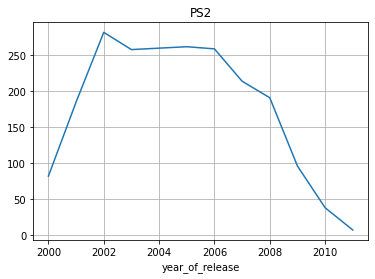

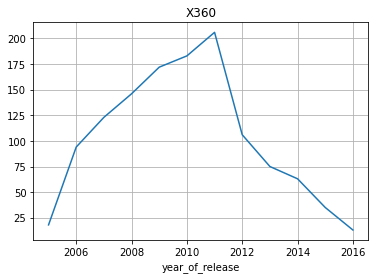

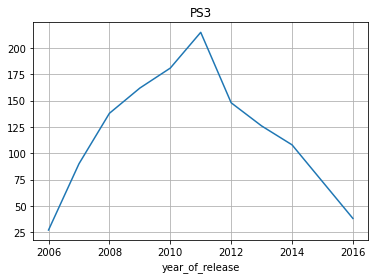

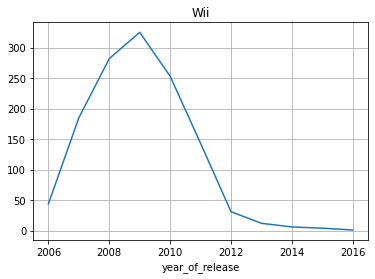

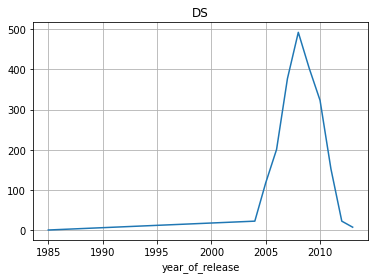

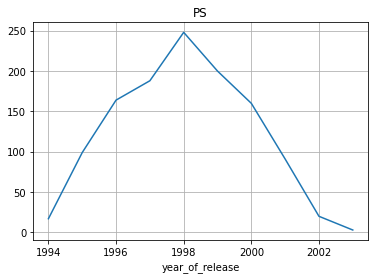

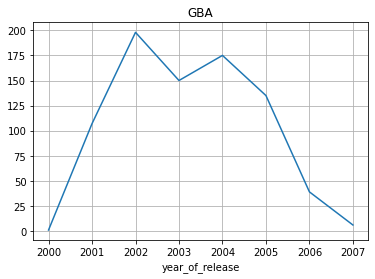

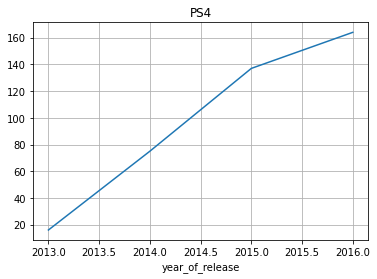

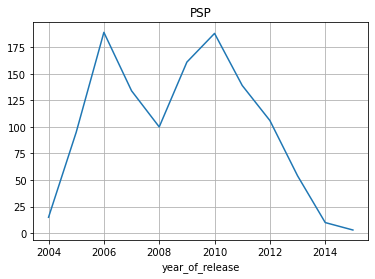

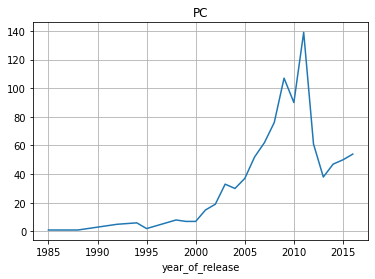

In [22]:
for platform in top_10_platform.index:
    (
        games_data[games_data['platform'] == platform]
        .groupby('year_of_release')['platform']
        .count()
        .plot(title=platform, grid=True)
    )
    plt.show()

Исходя из графиков представленных выше можно сделать вывод, что популярные платформы существуют приблизительно 10 +- 2 года и пика своей популярности достигают где-то в середине своего существования (5-6 лет).

Так как информация нужна для прогноза на 2017 год, то следует брать в учет платформы, которые вышли на рынок где-то 5-7 лет назад от нашей точки (2017 год). Соответственно, берем те платформы, на которые начали выпускать игры от 2012 года и запишем актуальные платформы в новую переменную <mark>games_data_actual</mark>

In [23]:
games_data_actual = games_data[games_data['year_of_release'] >= 2012]

Сгруппируем данные по платформам от 2012 года и по количеству выпускаемых игр по годам

In [24]:
games_data_actual.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')

total_sales
platform year_of_release             
3DS      2012.0                    93
         2013.0                    91
         2014.0                    80
         2015.0                    86
         2016.0                    46
DS       2012.0                    23
         2013.0                     8
PC       2012.0                    61
         2013.0                    38
         2014.0                    47
         2015.0                    50
         2016.0                    54
PS3      2012.0                   148
         2013.0                   126
         2014.0                   108
         2015.0                    73
         2016.0                    38
PS4      2013.0                    16
         2014.0                    75
         2015.0                   137
         2016.0                   164
PSP      2012.0                   106
         2013.0                    54
         2014.0                    10
         2015.0                     3
PSV      2012.0                    53
         2013.0                    63
         2014.0                   100
         2015.0                   110
         2016.0                    85
Wii      2012.0                    31
         2013.0                    12
         2014.0                     6
         2015.0                     4
         2016.0                     1
WiiU     2012.0                    32
         2013.0                    42
         2014.0                    31
         2015.0                    28
         2016.0                    14
X360     2012.0                   106
         2013.0                    75
         2014.0                    63
         2015.0                    35
         2016.0                    13
XOne     2013.0                    19
         2014.0                    61
         2015.0                    80
         2016.0                    87

Сохраняют свою популярность в 2015-2016 годах платформы:
- PC
- PS4
- XOne

На остальные платформы либо перестали выпускать игры, либо количество игр сокращается в разы

Платформы **DS** **PSP** и **Wii** 'умерли' и их можно убрать из нашего актуального списка 

In [25]:
games_data_actual = games_data_actual[games_data_actual['platform'] != 'DS']
games_data_actual = games_data_actual[games_data_actual['platform'] != 'PSP']
games_data_actual = games_data_actual[games_data_actual['platform'] != 'Wii']

Построим график ***boxplot*** для визуализации распределения продаж по платформам

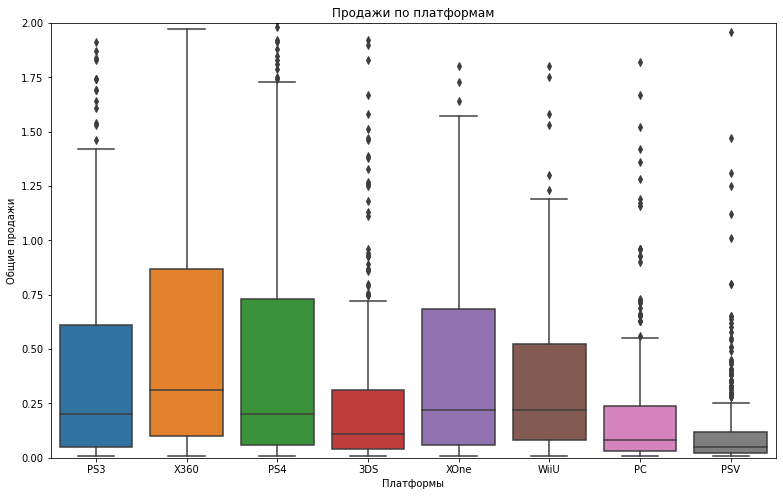

In [26]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = games_data_actual, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))

plt.show()

На графике видны квартили медианы и можно сравнивать эти значения между платформами 

По графику лидером является приставка XBox 360 

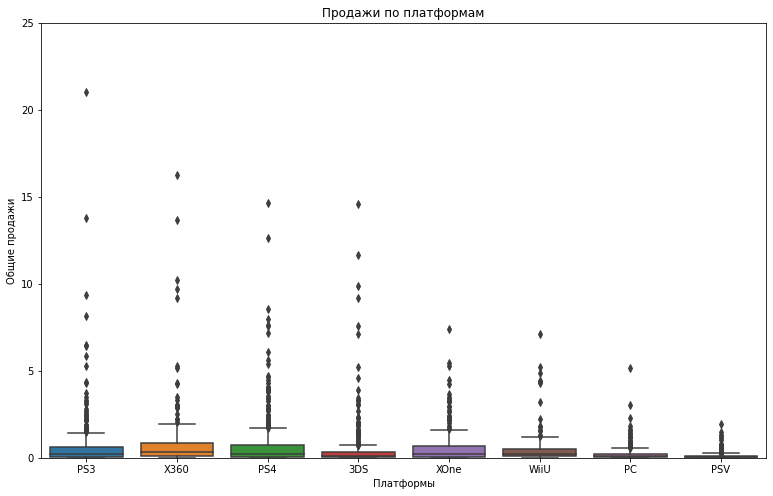

In [27]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = games_data_actual, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 25)))

plt.show()

Данный график иллюстрирует выбросы по каждой платформе

Наблюдаются большие выбросы по всем платформам. Это говорит о том что в каждой платформе есть игры которые продавались большими тиражами и множестиво игр которые не приносили серьезных доходов 

Возьмем самую популярную платформу. В данном случае это PS4. Построим **scatter matrix** по столбцам <mark>['critic_score', 'user_score', 'total_sales']</mark> для выявления корреляции 

In [28]:
ps4_data = games_data_actual[games_data_actual['platform'] == 'PS4']
ps4_data = ps4_data[['critic_score', 'user_score', 'total_sales']]

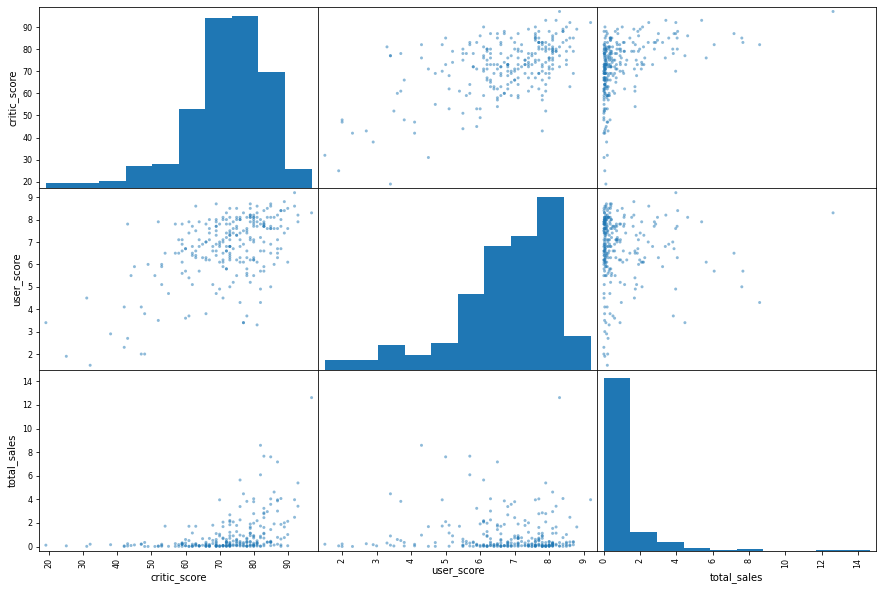

In [29]:
pd.plotting.scatter_matrix(ps4_data, figsize=(15, 10));

На графике отчетливо видно, что игры продаются в большем количестве, если критики выставили ей оценку больше 60 из 100. Теперь проверим корреляцию в цифрах

In [30]:
ps4_data['critic_score'].corr(ps4_data['total_sales'])

0.40656790206178095

In [31]:
ps4_data['total_sales'].corr(ps4_data['user_score'])

-0.031957110204556376

Корреляция показывает что оценки критиков гораздо сильнее влияют на успех игры нежели оценки пользователей

Возьмем две другие популярные платформы **PC** и **XOne**

Построим такие же матрицы для них 

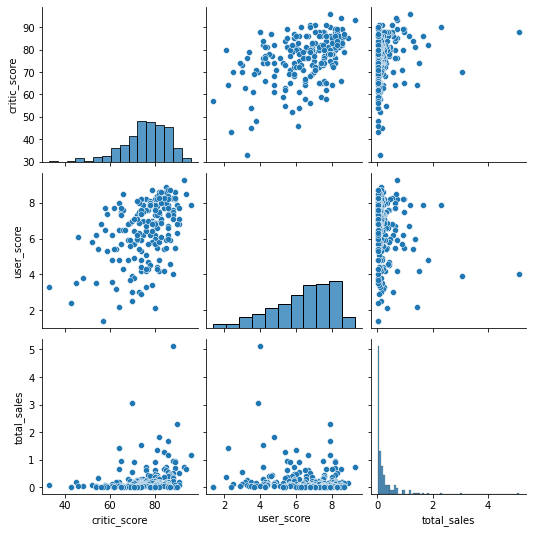

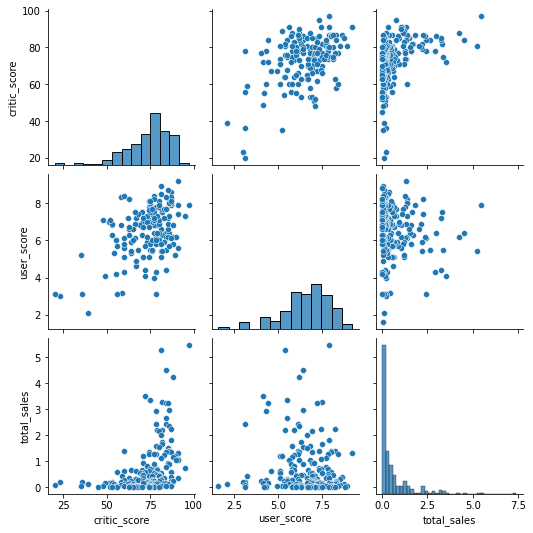

In [32]:
pc_data = games_data_actual[games_data_actual['platform'] == 'PC']
pc_data = pc_data[['critic_score', 'user_score', 'total_sales']]
xone_data = games_data_actual[games_data_actual['platform'] == 'XOne']
xone_data = xone_data[['critic_score', 'user_score', 'total_sales']]

for data in [pc_data, xone_data]:
    sns.pairplot(data)


Результат получился схожим с **PS4**

По актуальным данным распределим суммарную выручку по жанрам  

<AxesSubplot:xlabel='genre'>

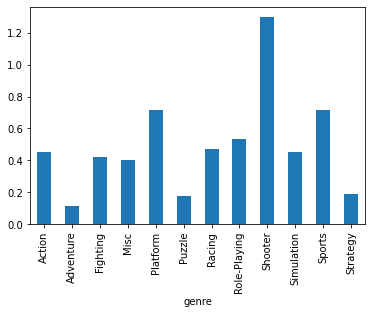

In [33]:
games_data_actual.groupby('genre')['total_sales'].mean().plot(kind='bar')

График показывает, что самый прибыльный жанр это ***Shooter*** с большим отрывом от остальных. Далее идут **Sports** и **Platform**. Самый низкий по прибыльности жанр - **Adventure**

## Составление портрета пользователей каждого региона

Через группировку данных получим топ-5 самых популярных платформ по продажам игр в **Северной Америке**, **Европе** и  **Японии** 

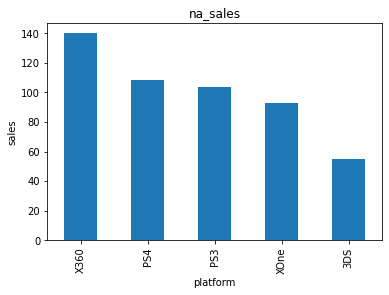

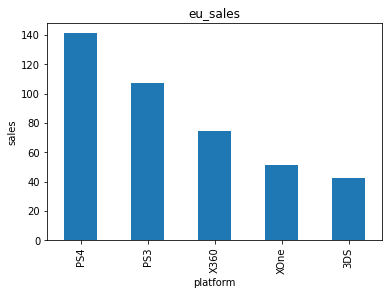

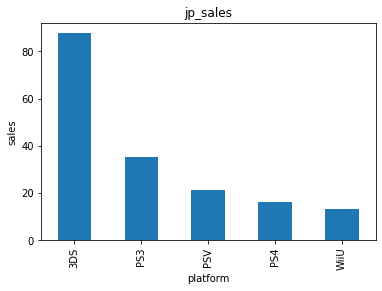

In [34]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games_data_actual
        .groupby('platform')[column]
        .sum()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar', title=column, ylabel='sales')
    )
    plt.show()

Самая популярная платформа в **Северной Америке** - *X360*

Самая популярная платформа в **Европе**  - *PS4*

Самая популярная платформа в **Японии** - *3DS*

Точно так же проверим популярность жанров по регионам

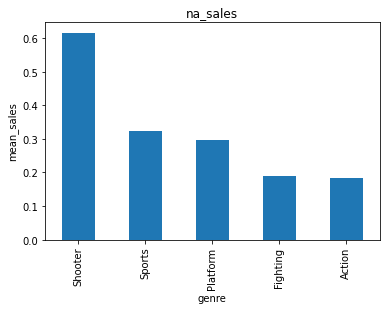

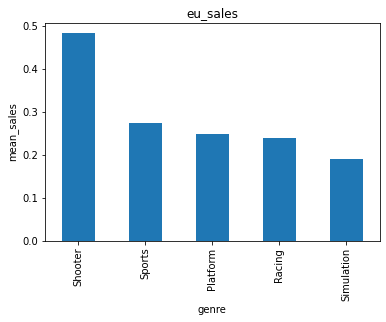

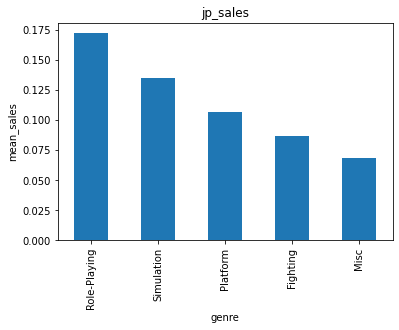

In [35]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games_data_actual
        .groupby('genre')[column]
        .mean()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar', title=column, ylabel='mean_sales')
    )
    plt.show()

В **Северной Америке** и **Европе** схожие предпочтения по жанрам. Популярные жанры:
- Shooter
- Sports
- Platform

А в **Японии** лидирует жанр *Role-Playing*

Оценим продажи по рейтингу ESRB

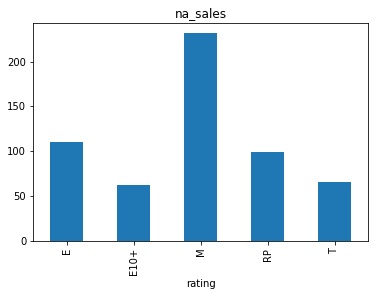

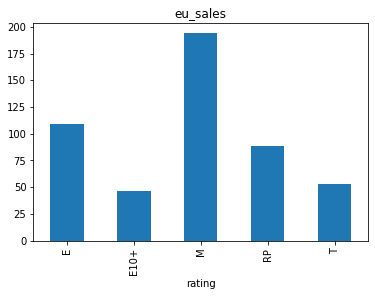

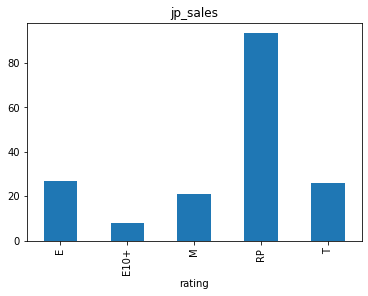

In [36]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games_data_actual
        .groupby('rating')[column]
        .sum()
        .plot(kind='bar', title=column)
    )
    plt.show()

В **Северной Америке** и **Европе** опять схожая картина и больше продаются игры с рейтингом **M** (17+)

В **Японии** же слишком много неопределенных рейтингов 

Также можно заметить, что рейтинг 10+ самый редкий во всех регионах

## Проверка гипотез

- **H0** Средний пользовательский рейтинг платформ Xbox One и PC одинаковый;

- **H1** Средний пользовательский рейтинг платформ Xbox One и PC отличаются;

перед проверкой гипотез удалим строки с NaN

In [37]:
sample_1 = games_data_actual[games_data_actual['platform'] == 'XOne']['user_score']
sample_1 = sample_1.dropna()

sample_2 = games_data_actual[games_data_actual['platform'] == 'PC']['user_score']
sample_2 = sample_2.dropna()

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha :
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


- **H0** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

- **H1** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

In [38]:
sample_1 = games_data_actual[games_data_actual['genre'] == 'Action']['user_score']
sample_1 = sample_1.dropna()
sample_2 = games_data_actual[games_data_actual['genre'] == 'Sports']['user_score']
sample_2 = sample_2.dropna()
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.105960298744456e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается средние пользовательские рейтинги жанров Action и Sports не равны 

# Вывод

 <font size="3"><b>Подготовка данных</b></font>


Во время работы с данными была проведена предобработка. Изменены типы данных некоторых столбцов и добавлен новый. Также были заполнены пропуски (по возможности).

 <font size="3"><b>Анализ данных</b></font>

Во время исследовательского анализа данных мы оценили количество выпускаемых игр по годам и пришли к выводу что самыми частыми, по выпуску игр, годами стали 2008-2009, а сама игровая индустрия начала сильно активизироваться в середине 90-х. 
Также оценили срок существования каждой взятой отдельно игровой платформы и оценили период ее пика. По нескольким выборкам определили самые популярные платформы подходящие под нашу цель исследования. 

Предположили что самыми популярными платформами 2017 года будут:
- PC 
- PS4
- Xbox One


Также отбросили неперспективные платформы, на которые либо перестали создавать игры, либо их было слишком мало.

<font size="3"><b>Корреляция и проверка гипотез</b></font>

Проверили корреляцию между событиями и выявили, что высокие оценки критиков влияют на успешность проекта в итоге.

Далее определили любимые жанры и платформы в зависимости от региона, а также влияние рейтинга ESRB на продажу игр.

Проверили две гипотезы, отбросили одну и не отбросили другую. 
Более подробно все описано в самом проекте.